In [2]:
from scipy.fftpack import fft
from scipy.signal import welch
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

def takeSecond(elem):
    return elem[1]

def get_first_n_peaks(x,y,no_peaks=5):
    indices_peaks = find_peaks(y)[0]
    if len(indices_peaks) >= no_peaks:
        peaks_x = [x[peak] for peak in indices_peaks]
        peaks_y = [y[peak] for peak in indices_peaks]
        x_y = list(zip(peaks_x, peaks_y))
        x_y.sort(key=takeSecond, reverse=True)
        peaks_x, peaks_y = zip(*x_y)
        
        return peaks_x[:no_peaks], peaks_y[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(indices_peaks)
        return [x[peak] for peak in indices_peaks] + [0]*missing_no_peaks, [y[peak] for peak in indices_peaks] + [0]*missing_no_peaks

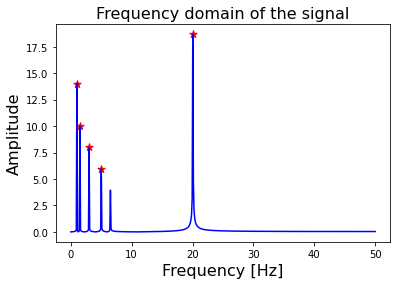

In [67]:
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14, 20]
frequencies = [6.5, 5, 3, 1.5, 1, 20]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values_fft, fft_values = get_fft_values(composite_y_value, T, N, f_s)
f_values_psd, psd_values = get_psd_values(composite_y_value, T, N, f_s)
t_values, autocorr_values = get_autocorr_values(composite_y_value, T, N, f_s)

x_peaks, y_peaks = get_first_n_peaks(f_values_fft, fft_values)

plt.plot(f_values_fft, fft_values, linestyle='-', color='blue')
plt.scatter(x_peaks, y_peaks, color='red', marker='*', s=60)
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

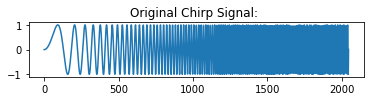

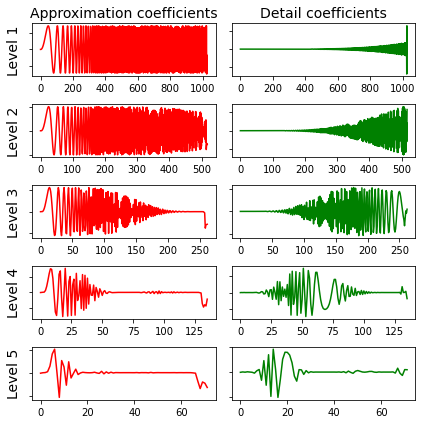

In [3]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()